In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [58]:

file_path = '/content/drive/MyDrive/Business_Automation_Task/new_preprocessed_data.csv'
df = pd.read_csv(file_path)

X = df.drop('target', axis=1)
y = df['target']

# # Convert categorical labels to numerical values
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)



In [59]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=15)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=15)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



In [60]:
# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [61]:
batch_size = 32

# Create DataLoader for training, validation, and test sets
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)



In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


# Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=500)
logreg_model.fit(X_train, y_train)
logreg_preds = logreg_model.predict(X_test)


# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)



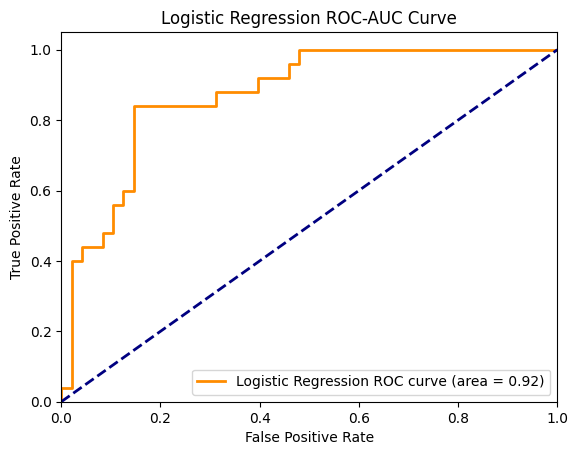

Logistic Regression - Accuracy: 73.97%, Precision: 0.7561, Recall: 0.7397, F1-Score: 0.7440, ROC-AUC: 0.9203


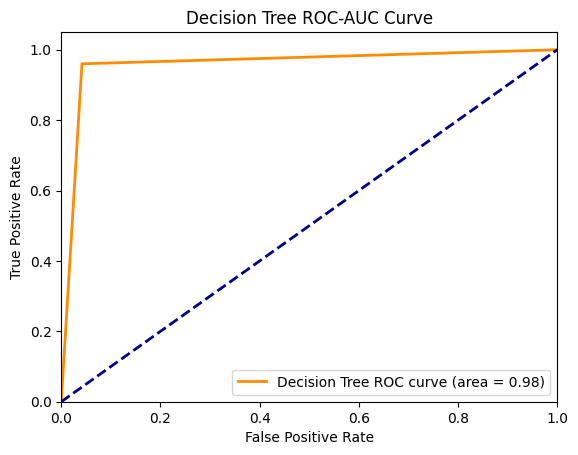

Decision Tree - Accuracy: 95.89%, Precision: 0.9608, Recall: 0.9589, F1-Score: 0.9590, ROC-AUC: 0.9783


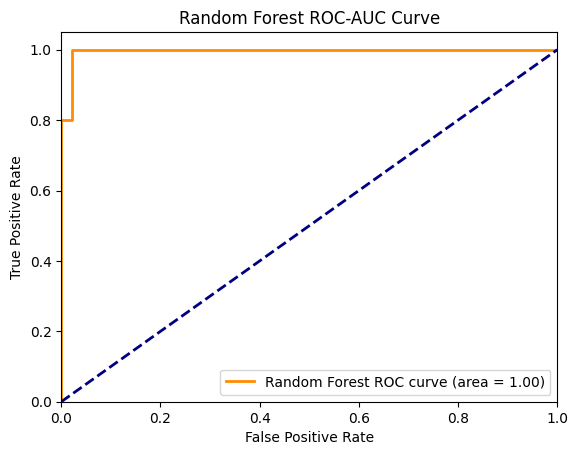

Random Forest - Accuracy: 98.63%, Precision: 0.9868, Recall: 0.9863, F1-Score: 0.9863, ROC-AUC: 0.9990


In [63]:

models = [('Logistic Regression', logreg_model, X_val, y_val),
          ('Decision Tree', dt_model, X_val, y_val),
          ('Random Forest', rf_model, X_val, y_val)]

for model_name, model, X_eval, y_eval in models:
    preds = model.predict(X_eval)

    accuracy = accuracy_score(y_eval, preds)
    precision = precision_score(y_eval, preds, average='weighted')
    recall = recall_score(y_eval, preds, average='weighted')
    f1 = f1_score(y_eval, preds, average='weighted')

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_eval, model.predict_proba(X_eval)[:, 1], pos_label=1)

    roc_auc = roc_auc_score(y_eval, model.predict_proba(X_eval), multi_class='ovr')

    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC-AUC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print(f'{model_name} - Accuracy: {accuracy * 100:.2f}%, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}')
